### Random imputation

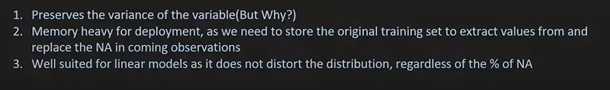

The random value we will select is from the data we have in the column already

Benefits:
1) It is very easy to apply
2) It doesn't change the distribution of our original data by much

Messes up the covariance and correlation

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])


In [4]:
df.sample(5)

,Survived,Age,Fare
410,0,NaN,7.8958
119,0,2.0,31.2750
218,1,32.0,76.2917
582,0,54.0,26.0000
0,0,22.0,7.2500


In [5]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [6]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [8]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [9]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

C:\Users\SYED NAVEED\AppData\Local\Temp\ipykernel_28032\3090101260.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).va

# 🧠 Random Value Imputation in Python (Pandas)

Random value imputation is a technique for handling missing values in a dataset by **randomly selecting** values from the observed (non-missing) data.

This method is often used to preserve the **variance** of a feature while avoiding **data leakage** (especially during testing).

---

## 🔍 Code Overview

```python
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = \
    X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = \
    X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values
```

---

## 🛠️ Explanation

### 🧪 For `X_train` (Training Data)

#### 1. **Targeting Missing Values**

```python
X_train['Age_imputed'][X_train['Age_imputed'].isnull()]
```

* Focuses only on the rows where `'Age_imputed'` is missing (`NaN`).
* These are the positions we want to fill using imputation.

#### 2. **Creating the Pool of Values**

```python
X_train['Age'].dropna()
```

* Returns only the non-missing values from the original `'Age'` column.
* This becomes the **pool** from which we randomly sample.

#### 3. **Determine How Many Values to Sample**

```python
X_train['Age'].isnull().sum()
```

* Returns the count of missing values in `X_train['Age']`.
* This is how many values we need to randomly pick.

#### 4. **Random Sampling and Assignment**

```python
.sample(...).values
```

* `.sample(n)` randomly selects `n` elements.
* `.values` converts the Series into a NumPy array.
* The selected values are then assigned to the missing entries in `'Age_imputed'`.

---

### 🧪 For `X_test` (Testing Data)

```python
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = \
    X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values
```

#### ✅ Key Difference:

* **Still sampling from `X_train['Age']`**, not `X_test['Age']`, even though the imputation is happening in `X_test`.
* This avoids **data leakage** and keeps the test data untouched by test-time statistics.

---

## 🌟 Why Use Random Value Imputation?

| Benefit                     | Description                                                             |
| --------------------------- | ----------------------------------------------------------------------- |
| **Preserves Variance**      | Maintains the natural spread of the data unlike mean/median imputation. |
| **Non-Parametric**          | Makes no assumption about the distribution of the data.                 |
| **Maintains Relationships** | Keeps the relationships between features more intact.                   |

> ⚠️ **Caution**: Not ideal for time-series data, where sequence and order matter.

---

## 📌 Example Walkthrough

Let's assume:

```python
X_train['Age'] = [25, 30, NaN, 40, NaN, 50]
X_test['Age'] = [35, NaN, 45, NaN]
```

### 🌟 For `X_train['Age_imputed']`:

* `X_train['Age'].dropna()` → `[25, 30, 40, 50]`
* `X_train['Age'].isnull().sum()` → `2`
* Sampled values (random): e.g., `[30, 50]`
* Imputed column might become: `[25, 30, 30, 40, 50, 50]`

### 🌟 For `X_test['Age_imputed']`:

* Use same pool: `[25, 30, 40, 50]`
* `X_test['Age'].isnull().sum()` → `2`
* Sampled values (random): e.g., `[25, 40]`
* Imputed column might become: `[35, 25, 45, 40]`

---


In [10]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([24.  , 30.  , 22.  , 23.5 , 43.  , 14.  , 32.  , 32.  , 61.  ,
       15.  , 24.  , 42.  , 24.  , 36.5 , 18.  ,  4.  , 38.  , 41.  ,
       27.  , 46.  , 19.  , 22.  , 21.  , 18.  , 19.  , 24.  , 17.  ,
       31.  , 58.  , 22.  , 13.  , 27.  , 40.  , 56.  , 31.  , 30.  ,
       14.  , 11.  , 28.  , 70.5 , 39.  ,  8.  , 24.  , 46.  , 29.  ,
        9.  ,  4.  , 29.  , 36.  , 33.  ,  4.  , 27.  , 25.  , 32.5 ,
       15.  , 37.  , 23.  , 48.  , 16.  , 22.  , 22.  , 22.  , 42.  ,
        4.  ,  7.  , 37.  , 24.  , 60.  , 54.  , 65.  ,  2.  , 21.  ,
       36.  , 47.  , 29.  , 52.  , 31.  , 20.  ,  0.75,  9.  , 50.  ,
       28.  , 49.  ,  5.  , 25.  , 43.  , 18.  , 63.  , 44.  , 28.  ,
        6.  , 36.  , 21.  , 17.  , 29.  , 30.  , 60.  , 34.  , 26.  ,
        4.  , 31.  , 24.  , 40.5 , 16.  , 31.  ,  1.  , 51.  , 14.  ,
       50.  , 10.  , 37.  , 40.  , 30.  , 30.  , 40.  , 36.  , 36.  ,
       18.  , 45.  , 45.5 , 28.  , 40.  , 19.  , 20.  , 59.  , 25.  ,
        9.  ,  2.  ,

In [11]:
X_train['Age'].isnull().sum()

148

In [12]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,37.0
493,71.0,49.5042,71.0
527,NaN,221.7792,26.0


C:\Users\SYED NAVEED\AppData\Local\Temp\ipykernel_28032\2642582470.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
C:\Users\SYED NAVEED\AppData\Local\Temp\ipykernel_28032\2642582470.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distp

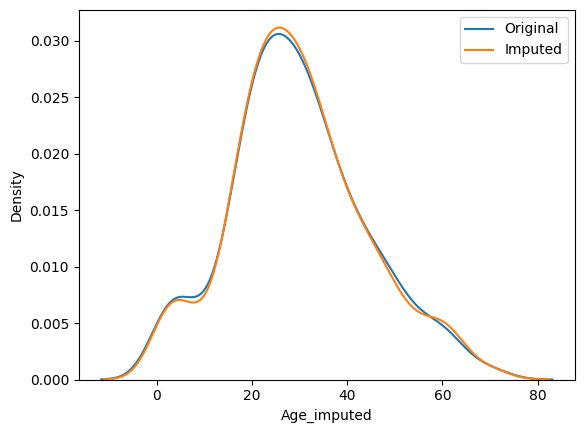

In [13]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [14]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  202.69417501777838


Quite the amount of difference in covariance

In [15]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,51.902550
Age,71.512440,204.349513,204.349513
Age_imputed,51.902550,204.349513,202.694175


<Axes: >

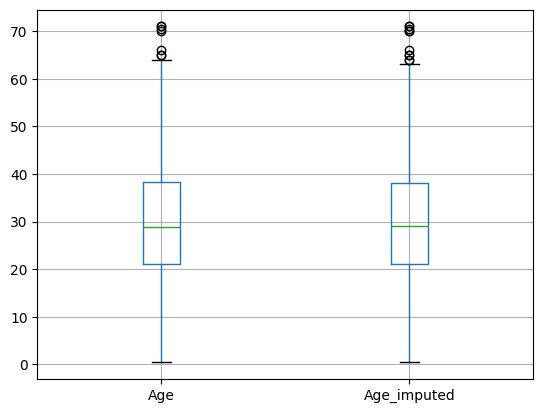

In [16]:
X_train[['Age', 'Age_imputed']].boxplot()

In [19]:
# Function to fill NaN values in 'Age' based on 'Fare'
def fill_age(row):
    if pd.isna(row['Age']):
        return df['Age'].dropna().sample(1, random_state=int(row['Fare'])).values[0]
    else:
        return row['Age']

# Apply the function to each row
X_train['Age_imputed'] = X_train.apply(fill_age, axis=1)

X_train.tail()

,Age,Fare,Age_imputed
534,30.0,8.6625,30.0
584,NaN,8.7125,30.0
493,71.0,49.5042,71.0
527,NaN,221.7792,35.0
168,NaN,25.9250,21.0


In [20]:
data = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [21]:
data.sample(5)

,FireplaceQu,GarageQual,SalePrice
496,Gd,TA,430000
1003,NaN,TA,136905
241,NaN,NaN,110500
606,NaN,TA,152000
1148,Gd,TA,116900


In [22]:
data.isnull().sum()

FireplaceQu    690
GarageQual      81
SalePrice        0
dtype: int64

In [23]:
X = data
y = data['SalePrice']

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [25]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [26]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\SYED NAVEED\AppData\Local\Temp\ipykernel_28032\856878696.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['Gara

In [27]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [28]:
temp

,original,imputed
TA,0.951043,0.952055
Fa,0.037171,0.036815
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [29]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.648709
TA,0.412439,0.540965
Fa,0.040917,0.056117
Po,0.027823,0.033670
Ex,0.024550,0.031425


C:\Users\SYED NAVEED\AppData\Local\Temp\ipykernel_28032\1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
C:\Users\SYED NAVEED\AppData\Local\Temp\ipykernel_28032\1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de441

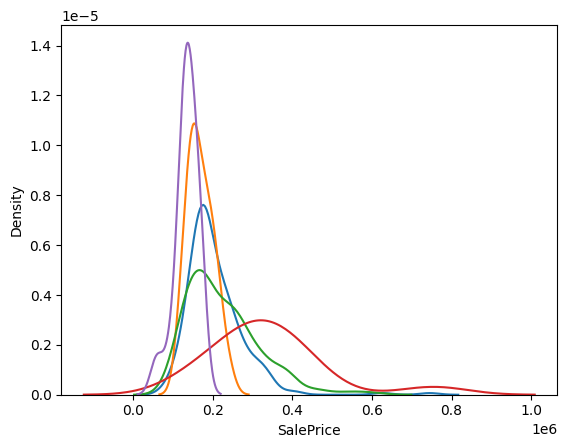

In [30]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

C:\Users\SYED NAVEED\AppData\Local\Temp\ipykernel_28032\722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
C:\Users\SYED NAVEED\AppData\Local\Temp\ipykernel_28032\722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom

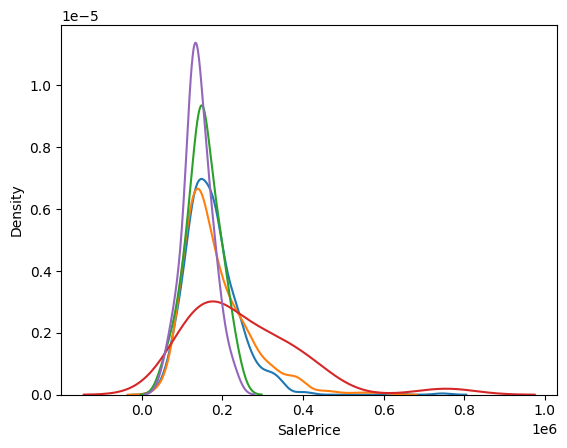

In [31]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()

### Missing Indicator

In missing indicator we make a new column (boolean) one which will tell us when the data is empty or not.

It sometimes helps us to improve our accuracy

In [32]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [33]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [35]:
X_train.head()

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458


In [37]:
from sklearn.impute import SimpleImputer

In [38]:
si = SimpleImputer()
X_train_trf = si.fit_transform(X_train)
X_test_trf = si.transform(X_test)

In [39]:
X_train_trf

array([[ 40.        ,  27.7208    ],
       [  4.        ,  16.7       ],
       [ 47.        ,   9.        ],
       ...,
       [ 71.        ,  49.5042    ],
       [ 29.78590426, 221.7792    ],
       [ 29.78590426,  25.925     ]])

In [40]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf,y_train)

y_pred = clf.predict(X_test_trf)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

61.452513966480446

In [42]:
from sklearn.impute import MissingIndicator

In [43]:
mi = MissingIndicator()

mi.fit(X_train)


MissingIndicator()

In [44]:
mi.features_

array([0], dtype=int64)

In [45]:
X_train_missing = mi.transform(X_train)

In [46]:
X_test_missing = mi.transform(X_test)

In [47]:
X_train['Age_NA'] = X_train_missing

In [48]:
X_test['Age_NA'] = X_test_missing

In [49]:
si = SimpleImputer()

X_train_trf2 = si.fit_transform(X_train)
X_test_trf2 = si.transform(X_test)

In [50]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf2,y_train)

y_pred = clf.predict(X_test_trf2)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

63.128491620111724

In [51]:
si = SimpleImputer(add_indicator=True)

In [52]:
X_train = si.fit_transform(X_train)

In [53]:
X_test = si.transform(X_test)

In [54]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf2,y_train)

y_pred = clf.predict(X_test_trf2)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

63.128491620111724

In [55]:
X_train

array([[ 40.        ,  27.7208    ,   0.        ,   0.        ],
       [  4.        ,  16.7       ,   0.        ,   0.        ],
       [ 47.        ,   9.        ,   0.        ,   0.        ],
       ...,
       [ 71.        ,  49.5042    ,   0.        ,   0.        ],
       [ 29.78590426, 221.7792    ,   1.        ,   1.        ],
       [ 29.78590426,  25.925     ,   1.        ,   1.        ]])

### Automatically select value for imputation

In [56]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [57]:
df = pd.read_csv('train.csv')

In [58]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [60]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [61]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [63]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
30,1,male,40.0,0,0,27.7208,C
10,3,female,4.0,1,1,16.7000,S
873,3,male,47.0,0,0,9.0000,S
182,3,male,9.0,4,2,31.3875,S
876,3,male,20.0,0,0,9.8458,S


In [64]:
numerical_features = ['Age', 'Fare']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Embarked', 'Sex']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore'))
])

In [65]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [66]:
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [67]:
from sklearn import set_config

set_config(display='diagram')
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Embarked', 'Sex'])])),
                ('classifier', LogisticRegression())])

In [68]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
    'classifier__C': [0.1, 1.0, 10, 100]
}

grid_search = GridSearchCV(clf, param_grid, cv=10)

In [69]:
grid_search.fit(X_train, y_train)

print(f"Best params:")
print(grid_search.best_params_)

Best params:
{'classifier__C': 1.0, 'preprocessor__cat__imputer__strategy': 'most_frequent', 'preprocessor__num__imputer__strategy': 'mean'}


In [70]:
print(f"Internal CV score: {grid_search.best_score_:.3f}")

Internal CV score: 0.788


In [71]:
import pandas as pd

cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[['param_classifier__C','param_preprocessor__cat__imputer__strategy','param_preprocessor__num__imputer__strategy','mean_test_score']]

,param_classifier__C,param_preprocessor__cat__imputer__strategy,param_preprocessor__num__imputer__strategy,mean_test_score
4,1.0,most_frequent,mean,0.787852
5,1.0,most_frequent,median,0.787852
6,1.0,constant,mean,0.787852
7,1.0,constant,median,0.787852
8,10.0,most_frequent,mean,0.787852
9,10.0,most_frequent,median,0.787852
10,10.0,constant,mean,0.787852
11,10.0,constant,median,0.787852
12,100.0,most_frequent,mean,0.787852
13,100.0,most_frequent,median,0.787852
